In [25]:
import os
import pandas as pd

from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
# use pandas to open reviews dataset
data  = os.path.join(os.getcwd(), "data", "farm-data","farm-ads")
ads = pd.read_csv(data, sep='\t', header=None)
ads.columns = ["status","text"]
mapping = {-1: "not accepted", 1: "accepted"}
ads["status"] = ads["status"].map(mapping)
ads = ads.fillna("none")
ads.head()

,status,text
0,accepted,ad-jerry ad-bruckheimer ad-chase ad-premier a...
1,not accepted,ad-rheumatoid ad-arthritis ad-expert ad-tip a...
2,not accepted,ad-rheumatologist ad-anju ad-varghese ad-yonk...
3,not accepted,ad-siemen ad-water ad-remediation ad-water ad...
4,not accepted,ad-symptom ad-muscle ad-weakness ad-genetic a...


In [36]:
# take first column and do tfidf
# vectorizer = TfidfVectorizer()
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(ads['text'])
y = ads["status"]


braycurtis


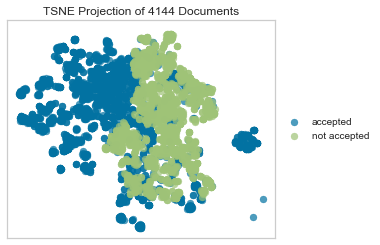

canberra


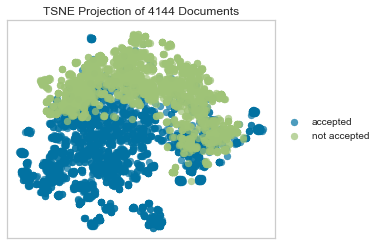

chebyshev


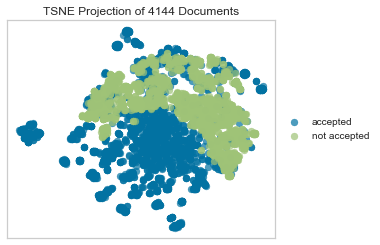

cityblock


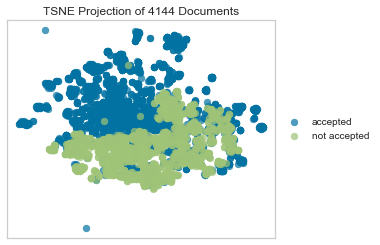

correlation


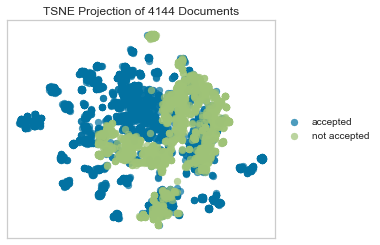

cosine


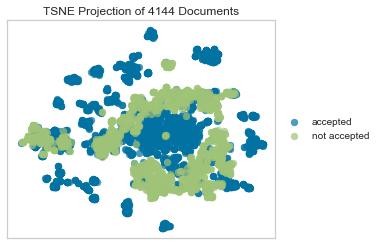

dice


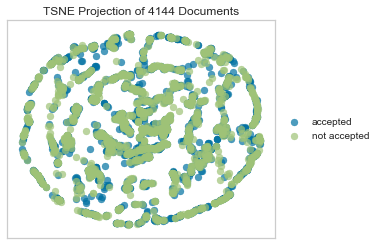

euclidean


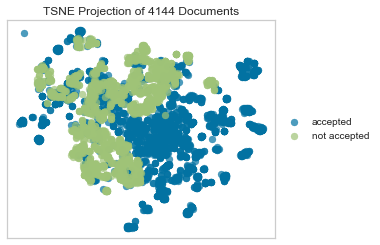

hamming


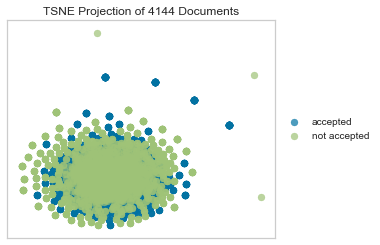

jaccard


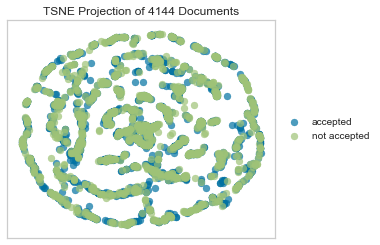

kulsinski


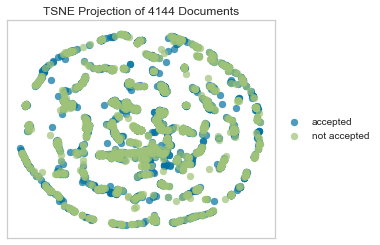

mahalanobis


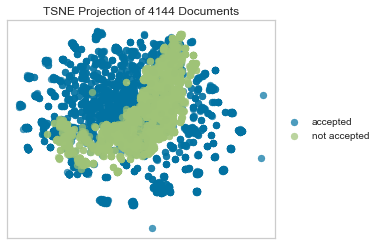

matching


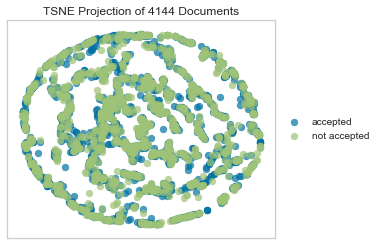

minkowski


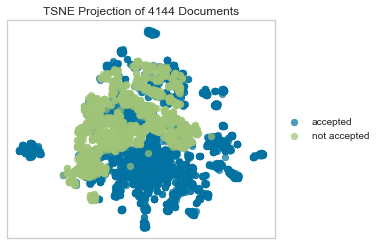

rogerstanimoto


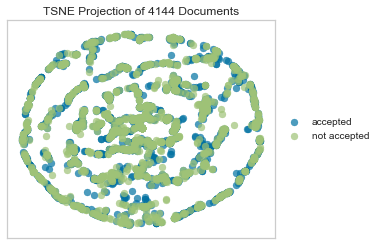

russellrao


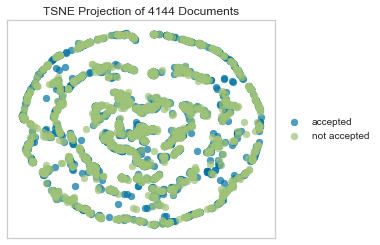

sokalmichener


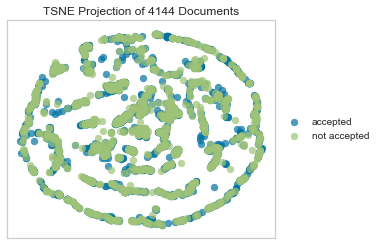

sokalsneath


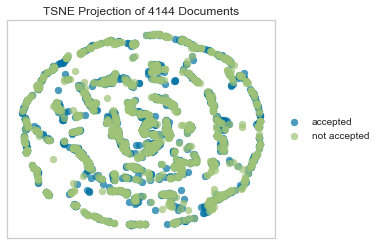

sqeuclidean


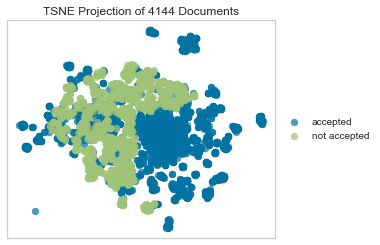

In [37]:
distance_functions = [
    "braycurtis", "canberra", "chebyshev", "cityblock", "correlation", "cosine",
    "dice", "euclidean", "hamming", "jaccard", "kulsinski", "mahalanobis",
    "matching", "minkowski", "rogerstanimoto", "russellrao",
    "sokalmichener", "sokalsneath", "sqeuclidean"
]

for metric in distance_functions:
    print(metric)
    if metric == "mahalanobis":
        tsne = TSNEVisualizer(metric=metric, method='exact')
    else: 
        tsne = TSNEVisualizer(metric=metric)
    tsne.fit(X, y)
    tsne.poof()